In [2]:
import os
import yaml
import torch
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

In [9]:


def load_hparams(hparams_file):
    with open(hparams_file, 'r') as f:
        hparams = yaml.safe_load(f)
    return hparams

def load_event_logs(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    return event_acc

def extract_validation_loss(event_accumulator, key='val_metrics/ssim'):
    val_loss = []
    for scalar in event_accumulator.scalars.Items(key):
        val_loss.append((scalar.step, scalar.value))
    return val_loss

def plot_validation_loss(log_dirs, labels, key='val_metrics/ssim'):
    plt.figure(figsize=(12, 8))
    plt.rc('font', size=14)  # Set the default font size for text

    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D']
    color = 'black'

    for i, (log_dir, label) in enumerate(zip(log_dirs, labels)):
        event_accumulator = load_event_logs(log_dir)
        val_loss = extract_validation_loss(event_accumulator, key)
        if val_loss:
            steps, losses = zip(*val_loss)
            plt.plot(steps, losses, label=label, linestyle=line_styles[i % len(line_styles)],
                     marker=markers[i % len(markers)], color=color, linewidth=2.0, markersize=6)
        else:
            print(f"No validation loss found for {label}")

    plt.xlabel('Steps', fontsize=16)
    plt.ylabel('SSIM Value', fontsize=16)
    plt.title('Validation SSIM Comparison', fontsize=18)
    plt.legend(fontsize=14, loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('ssim_val_loss_comparison.png', dpi=300)
    plt.show()


config = {
    'log_dirs': [
        'lightning_logs/version_unet_l1',
        'lightning_logs/version_unet_roi'
    ],
    'labels': [
        'UNet using L1',
        'UNet using modified L1'
    ]
}

config['labels']

['UNet using L1', 'UNet using modified L1']

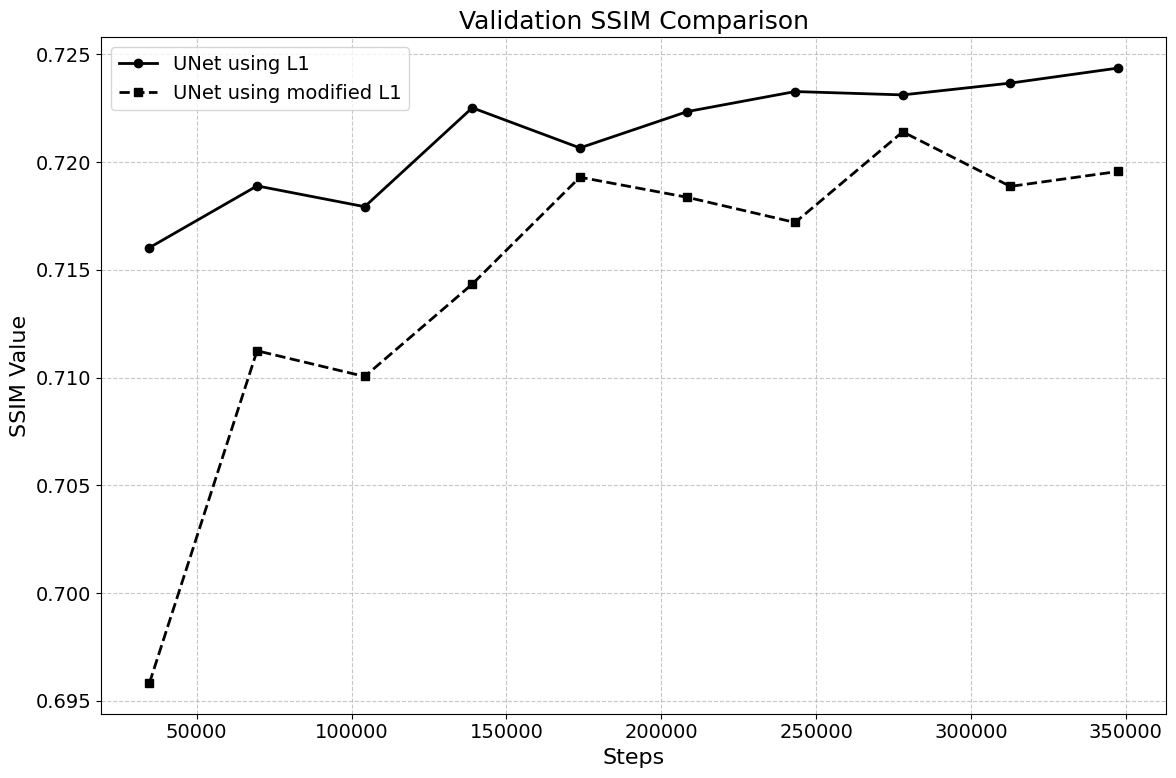

In [35]:
plot_validation_loss(config['log_dirs'], config['labels'])#, 'validation_loss')

In [36]:
def plot_val_loss(log_dirs, labels, key='validation_loss'):
    plt.figure(figsize=(12, 8))
    plt.rc('font', size=14)  # Set the default font size for text

    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D']
    color = 'black'

    for i, (log_dir, label) in enumerate(zip(log_dirs, labels)):
        event_accumulator = load_event_logs(log_dir)
        val_loss = extract_validation_loss(event_accumulator, key)
        if val_loss:
            steps, losses = zip(*val_loss)
            plt.plot(steps, losses, label=label, linestyle=line_styles[i % len(line_styles)],
                     marker=markers[i % len(markers)], color=color, linewidth=2.0, markersize=6)
        else:
            print(f"No validation loss found for {label}")

    plt.xlabel('Steps', fontsize=16)
    plt.ylabel('Validation Loss (L1)', fontsize=16)
    plt.title('Validation L1 Loss Comparison', fontsize=18)
    plt.legend(fontsize=14, loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('l1_val_loss_comparison.png', dpi=300)
    plt.show()

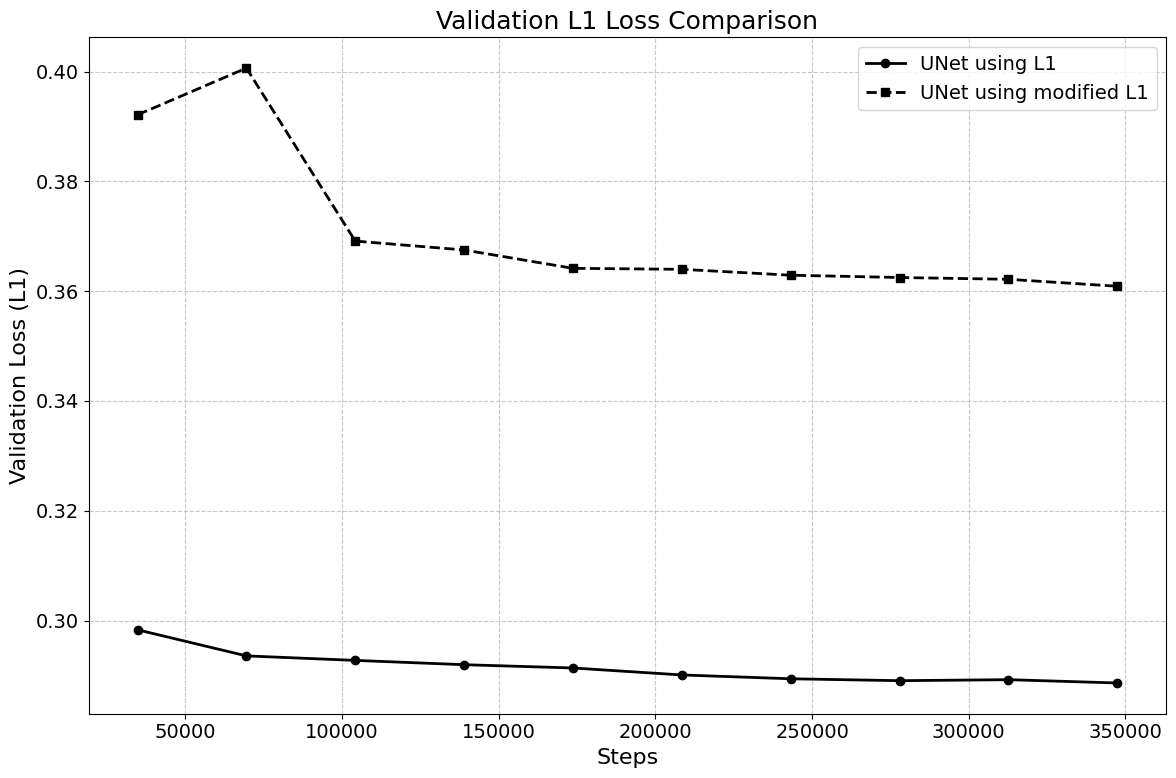

In [37]:
plot_val_loss(config['log_dirs'], config['labels'], 'validation_loss')

In [4]:
event_test = load_event_logs('lightning_logs/version_33')

In [5]:
event_test

In [6]:
event_test.scalars.Keys()

['hp_metric',
 'lr-RMSprop',
 'loss',
 'epoch',
 'validation_loss',
 'val_metrics/nmse',
 'val_metrics/ssim',
 'val_metrics/psnr']

In [7]:
event_test.scalars.Items('val_metrics/ssim')

[ScalarEvent(wall_time=1743191446.844409, step=34729, value=0.7196511030197144),
 ScalarEvent(wall_time=1743196349.8559842, step=69459, value=0.7174986004829407),
 ScalarEvent(wall_time=1743201251.446749, step=104189, value=0.7205331325531006),
 ScalarEvent(wall_time=1743206150.036818, step=138919, value=0.7209492325782776),
 ScalarEvent(wall_time=1743211046.578479, step=173649, value=0.7231563925743103),
 ScalarEvent(wall_time=1743215942.361144, step=208379, value=0.7231515645980835),
 ScalarEvent(wall_time=1743220836.7819772, step=243109, value=0.7211728692054749),
 ScalarEvent(wall_time=1743225734.241009, step=277839, value=0.7242276072502136),
 ScalarEvent(wall_time=1743230630.2463942, step=312569, value=0.7249097228050232),
 ScalarEvent(wall_time=1743235526.4570382, step=347299, value=0.7229841351509094)]

In [8]:
event_test.images.Items('val_images_idx_101/target')

[ImageEvent(wall_time=1743191074.422348, step=34730, encoded_image_string=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x01@\x08\x02\x00\x00\x00B\xf22\xfd\x00\x01\x00\x00IDATx\x9cL\xbdil\xdby\x9a\xe7GR\xa4x\x93\xa2xS\x14\x0f\x91\xa2\x0e\xea\xb6,\xdfv\xb9\\U\xae\xea\xae>v2\xc9\xa6\x81\xc5\x06\x08\x02\xe4]^\x06A\xf2&/\x03\xe4m\x82\xbcK\x90\x99\xdd\xd9\x99\xc1\xa4{\xba\xa7{\xearU\xf9\x94-\xc9\xbaOR\x12E\x89\xe2}\xdf7\x15\xd8\x9f@\x88^\x0cfw\xaa\xca\x16\xf9\xff\xff~\xcf\xf3=\x85\x83\x83\x83\xe5ry``\xa0Z\xad\n\x04\x02\xbd^\x9f\xc9d\xe4ry___\xa7\xd3\x99\x98\x98H\xa5R333\xf5z\xbdR\xa9\xcc\xce\xce\x9e\x9d\x9d\x99\xcdf\xb5Zm\xb7\xdb\x8b\xc5b \x10\xd0h4\xa1PH$\x12\xb9\\\xaen\xb7{yy9>>.\x12\x89R\xa9\xd4\xd5\xd5U\xab\xd5R\xa9T###\xf5z=\x12\x89H\xa5\xd2^\xaf\xd7\xdf\xdf\x1f\x8b\xc5\xf2\xf9\xfc\x9d;wR\xa9\xd4\xf2\xf2\xb2\xc9d2\x9b\xcd\x83\x83\x83\xadV+\x91H\xa4\xd3\xe9\xf1\xf1q\x8dF\xa3\xd5j\xfb\xfb\xfb\x9f={\xe6\xf1x\x86\x87\x87\x9f={f0\x18\x94Je6\x9b\x1d\x1e\x1eV\xab\xd5\x85Bapp0\x1e\

In [9]:
event_test.images.Keys()

['val_images_idx_101/target',
 'val_images_idx_101/reconstruction',
 'val_images_idx_101/error',
 'val_images_idx_429/target',
 'val_images_idx_429/reconstruction',
 'val_images_idx_429/error',
 'val_images_idx_789/target',
 'val_images_idx_789/reconstruction',
 'val_images_idx_789/error',
 'val_images_idx_865/target',
 'val_images_idx_865/reconstruction',
 'val_images_idx_865/error',
 'val_images_idx_2168/target',
 'val_images_idx_2168/reconstruction',
 'val_images_idx_2168/error',
 'val_images_idx_2260/target',
 'val_images_idx_2260/reconstruction',
 'val_images_idx_2260/error',
 'val_images_idx_2288/target',
 'val_images_idx_2288/reconstruction',
 'val_images_idx_2288/error',
 'val_images_idx_2582/target',
 'val_images_idx_2582/reconstruction',
 'val_images_idx_2582/error',
 'val_images_idx_2992/target',
 'val_images_idx_2992/reconstruction',
 'val_images_idx_2992/error',
 'val_images_idx_3032/target',
 'val_images_idx_3032/reconstruction',
 'val_images_idx_3032/error',
 'val_images

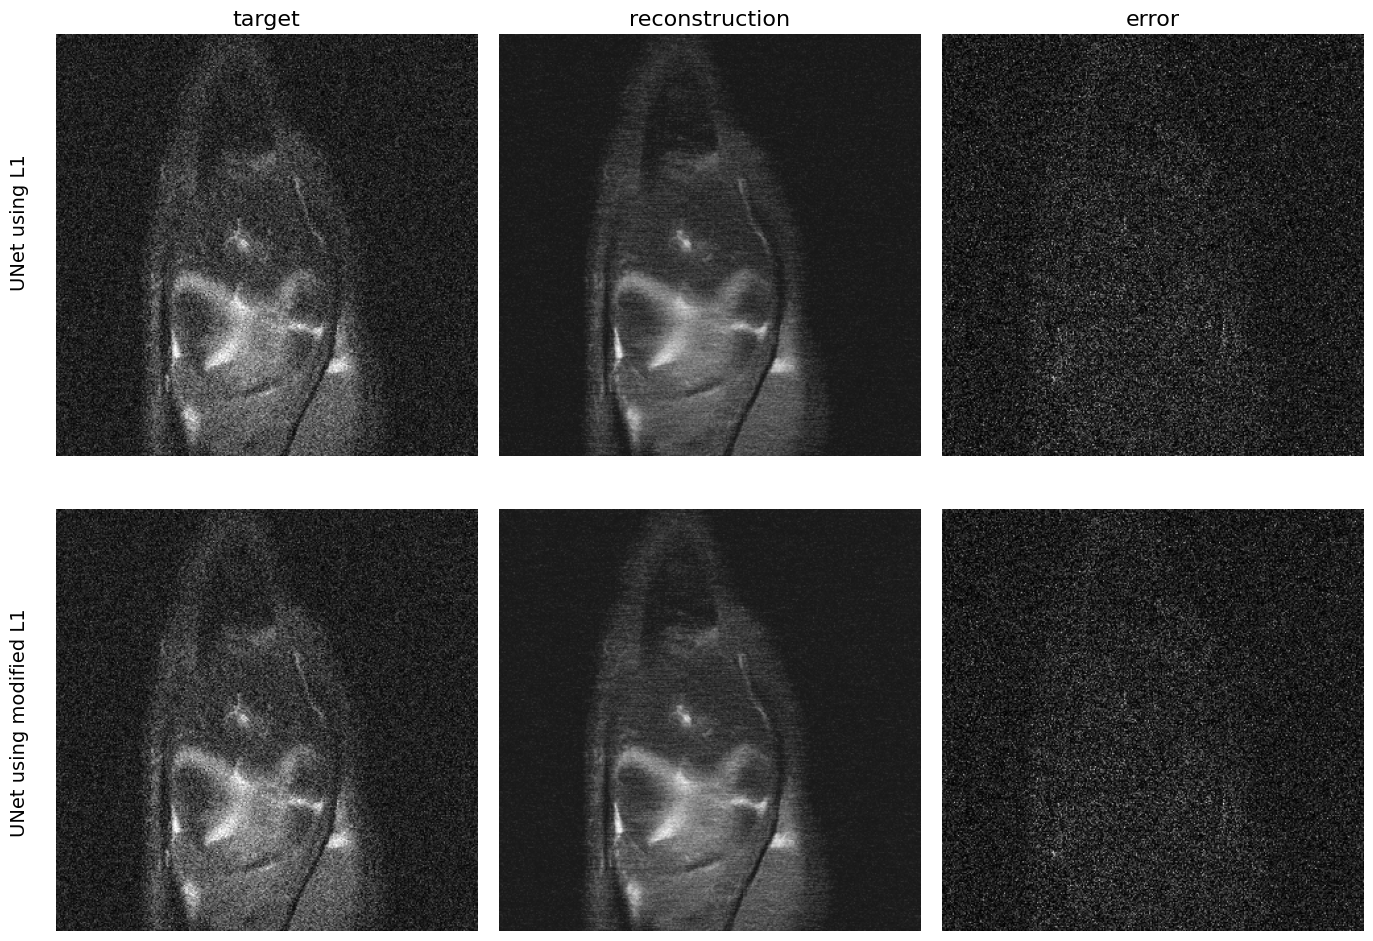

In [10]:
import numpy as np
import io
from PIL import Image

def load_event_logs(log_dir):
    event_acc = EventAccumulator(log_dir, size_guidance={'images': 0})
    event_acc.Reload()
    return event_acc

def extract_images(event_accumulator, tag):
    images = event_accumulator.Images(tag)
    if images:
        image_data = images[-1]  # Get the latest image event
        image = Image.open(io.BytesIO(image_data.encoded_image_string))
        return np.array(image)
    return None

def plot_images(model_logs, model_labels, image_tags):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    plt.rc('font', size=14)  # Set the default font size for text

    for row, (log_dir, label) in enumerate(zip(model_logs, model_labels)):
        event_accumulator = load_event_logs(log_dir)
        
        for col, tag in enumerate(image_tags):
            image = extract_images(event_accumulator, tag)
            if image is not None:
                axes[row, col].imshow(image, cmap='gray')
                axes[row, col].axis('off')
                if row == 0:
                    axes[row, col].set_title(tag.split('/')[-1], fontsize=16)
            else:
                print(f"No image found for tag {tag} in model {label}")

    fig.text(0.09, 0.75, 'UNet using L1', fontsize=14, ha='center', va='center', rotation='vertical')
    fig.text(0.09, 0.25, 'UNet using modified L1', fontsize=14, ha='center', va='center', rotation='vertical')

    plt.tight_layout(rect=[0.1, 0, 1, 1])  # Adjust layout to make room for legends on the left
    plt.savefig('model_comparison_images.png', dpi=300)
    plt.show()


config = {
    'log_dirs': [
        'lightning_logs/version_32',
        'lightning_logs/version_33'
    ],
    'labels': [
        'UNet using L1',
        'UNet using modified L1'
    ],
    'image_tags': [
        'val_images_idx_429/target',
        'val_images_idx_429/reconstruction',
        'val_images_idx_429/error'
    ]
}

# Plot the images comparison
plot_images(config['log_dirs'], config['labels'], config['image_tags'])

In [11]:
import os
import pandas as pd
import numpy as np
from PIL import ImageDraw, Image
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

fastmri_path = 'data/singlecoil_train/'
fastmri_file = 'file1000023'
annotation_path = 'data/annotations/knee.csv'

In [12]:
df = pd.read_csv(annotation_path, index_col=None, header=0)
labels_for_file = df.loc[df['file'] == fastmri_file]
labels_for_file['label'].unique()

array(['Bone- Subchondral edema',
       'Cartilage - Partial Thickness loss/defect'], dtype=object)

In [13]:
labels_for_file

file  slice study_level      x      y  width  height  \
177  file1000023      5          No  177.0   85.0   18.0    26.0   
178  file1000023      6          No  148.0   91.0   47.0    42.0   
179  file1000023      7          No  146.0   95.0   47.0    31.0   
180  file1000023      8          No  148.0   99.0   23.0    28.0   
181  file1000023     23          No  113.0  180.0   26.0     7.0   

                                         label  
177                    Bone- Subchondral edema  
178                    Bone- Subchondral edema  
179                    Bone- Subchondral edema  
180                    Bone- Subchondral edema  
181  Cartilage - Partial Thickness loss/defect

In [14]:
datafile = os.path.join(fastmri_path, fastmri_file + '.h5')
f = h5py.File(datafile,'r')
img_data = f['reconstruction_rss'][:]
img_data = img_data[:, ::-1, :]  # flipped up down

In [15]:
def plot_bounding_box(image, labels):
    plotted_image = ImageDraw.Draw(image)
    for label in labels:
        _, _, _, x0, y0, w, h, label_txt = label
        x1 = x0 + w
        y1 = y0 + h
        plotted_image.rectangle(((x0,y0), (x1,y1)), outline="white")
        plotted_image.text((x0, max(0, y0 - 10)), label_txt, fill= "white")
    return np.array(image)

    # center_x, center_y = x + w / 2, y + h / 2
    # # mask[..., y : y + h, x : x + w] = 1
    # width = min(75, w*2.5)
    # height = min(75, h*2.5)
    # min_x, max_x = min(0, center_x - width), max(center_x + width, 320)
    # min_y, max_y = min(0, center_y - height), max(center_y + height, 320)
    # mask[..., int(min_y) : int(max_y), int(min_x) : int(max_x)] = 1

def plot_expanded_bounding_box(image, labels):
    plotted_image = ImageDraw.Draw(image)
    for label in labels:
        _, _, _, x0, y0, w, h, label_txt = label
        center_x, center_y = x0 + w / 2, y0 + h / 2
        width = min(75, w*2.5)
        height = min(75, h*2.5)
        min_x, max_x = max(0, center_x - width), min(center_x + width, 320)
        min_y, max_y = max(0, center_y - height), min(center_y + height, 320)
        print(min_x, min_y, max_x, max_y)
        plotted_image.rectangle(((min_x, min_y), (max_x, max_y)), outline="white")
        plotted_image.text((min_x, max(0, min_y - 10)), label_txt, fill= "white")
    return np.array(image)

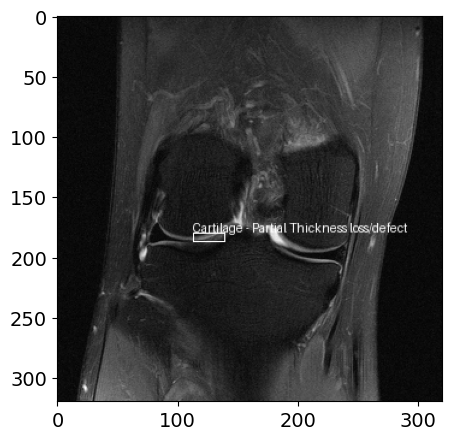

In [16]:
slice_choice = 23
labels_for_slice = labels_for_file.loc[labels_for_file['slice'] == slice_choice].values.tolist()
arrimg = np.squeeze(img_data[slice_choice,:,:])
image_2d_scaled = (np.maximum(arrimg,0) / arrimg.max()) * 255.0
image_2d_scaled = Image.fromarray(np.uint8(image_2d_scaled))
annotated_img = plot_bounding_box(image_2d_scaled, labels_for_slice)
plt.figure(figsize = (5,5))
plt.imshow(annotated_img,'gray')
plt.show()

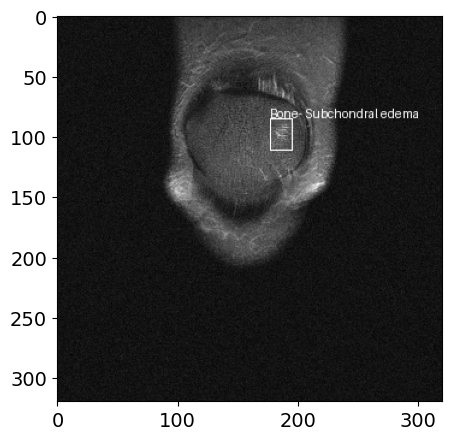

In [17]:
slice_choice = 5
labels_for_slice = labels_for_file.loc[labels_for_file['slice'] == slice_choice].values.tolist()
arrimg = np.squeeze(img_data[slice_choice,:,:])
image_2d_scaled = (np.maximum(arrimg,0) / arrimg.max()) * 255.0
image_2d_scaled = Image.fromarray(np.uint8(image_2d_scaled))
annotated_img = plot_bounding_box(image_2d_scaled, labels_for_slice)
plt.figure(figsize = (5,5))
plt.imshow(annotated_img,'gray')
plt.show()

61.0 166.0 191.0 201.0


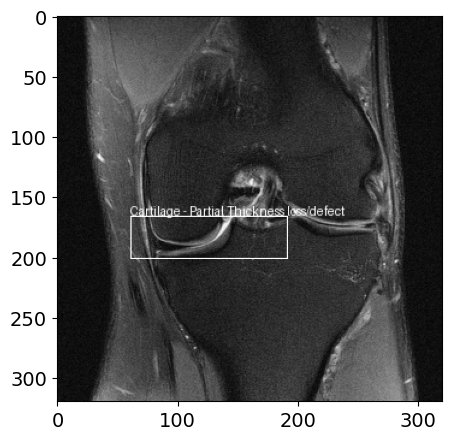

In [81]:
slice_choice = 23
labels_for_slice = labels_for_file.loc[labels_for_file['slice'] == slice_choice].values.tolist()
arrimg = np.squeeze(img_data[slice_choice,:,:])
image_2d_scaled = (np.maximum(arrimg,0) / arrimg.max()) * 255.0
image_2d_scaled = Image.fromarray(np.uint8(image_2d_scaled))
annotated_img = plot_expanded_bounding_box(image_2d_scaled, labels_for_slice)
plt.figure(figsize = (5,5))
plt.imshow(annotated_img,'gray')
plt.show()

In [69]:
df

file  slice study_level      x      y  width  height  \
0      file1000001     14          No   90.0  173.0   35.0    10.0   
1      file1000001     15          No   93.0  173.0   39.0    10.0   
2      file1000001     15          No  117.0  162.0   20.0    12.0   
3      file1000001     16          No  116.0  163.0   23.0    12.0   
4      file1000001     18          No  191.0  186.0   44.0     8.0   
...            ...    ...         ...    ...    ...    ...     ...   
16162  file1002546     14          No  200.0   26.0   70.0   125.0   
16163  file1002546     15          No  212.0   33.0   58.0   124.0   
16164  file1002546     16          No  225.0   39.0   47.0   123.0   
16165  file1002546     22          No  216.0  184.0   20.0     9.0   
16166  file1002546     23          No  214.0  185.0   19.0     8.0   

                                           label  
0      Cartilage - Partial Thickness loss/defect  
1      Cartilage - Partial Thickness loss/defect  
2                        Bone- Subchondral edema  
3                        Bone- Subchondral edema  
4      Cartilage - Partial Thickness loss/defect  
...                                          ...  
16162                            Joint Effusion   
16163                            Joint Effusion   
16164                            Joint Effusion   
16165  Cartilage - Partial Thickness loss/defect  
16166  Cartilage - Partial Thickness loss/defect  

[16167 rows x 8 columns]

In [72]:
areas = []

for i, row in df.iterrows():
    x, y, w, h = row['x'], row['y'], row['width'], row['height']
    area = w * h / (320 * 320)
    areas.append(area)

df['area'] = areas

In [73]:
df['area'].describe()

count    16154.000000
mean         0.016739
std          0.035827
min          0.000000
25%          0.002930
50%          0.005332
75%          0.010986
max          0.450791
Name: area, dtype: float64

In [5]:
val_loss = extract_validation_loss(event_test)

KeyError: 'Key val_loss was not found in Reservoir'

In [6]:
log_dirs

['lightning_logs/version_unet_l1', 'lightning_logs/version_unet_roi']

In [5]:
config = {
    'checkpoints': [
        'lightning_logs/version_unet_l1',
        'lightning_logs/version_unet_roi'
    ]
}

# log_dirs = [os.path.join(os.path.dirname(checkpoint), 'logs') for checkpoint in config['checkpoints']]
log_dirs = [checkpoint for checkpoint in config['checkpoints']]

# Plot the validation loss comparison
plot_validation_loss(log_dirs[0], log_dirs[1])

DirectoryDeletedError: Directory l has been permanently deleted

<Figure size 1000x600 with 0 Axes>